# Optimització - Descens del gradient

L’optimització matemàtica o la programació matemàtica és la selecció d’un millor element a partir d’un conjunt d’alternatives disponibles. Problemes d’optimització sorgeixen en totes les disciplines quantitatives, des de la informàtica i l’enginyeria fins a la investigació d’operacions i l’economia, i el desenvolupament de mètodes de solució d'aquests problemes ha estat d’interès en les matemàtiques durant segles.

En el cas més senzill, un problema d’optimització consisteix a maximitzar o minimitzar una funció real mitjançant l’elecció sistemàtica dels valors d’entrada dins d’un conjunt permès i el càlcul del valor de la funció. La generalització de la teoria i tècniques d’optimització a altres formulacions constitueix una àmplia àrea de les matemàtiques aplicades. 

Més generalment, l’optimització inclou trobar "els millors valors disponibles" d'alguna funció objectiu donat un domini (o entrada) definits, incloent una varietat de diferents tipus de funcions objectiu i diferents tipus de dominis.

Es pot representar un problema d'optimització de la següent manera:

- Tenint en compte: una funció $f : A \to \mathbb{R}$ des d'algun conjunt $A$ als nombres reals.
- Busquem: un element ${x}_0 \in A$ tal que $f({x}_{0}) \leq f({x})$ per a tots els ${x} \in A$ ("minimització") o tal que $f({x}_{0}) \geq f({x})$  per a tots els ${x} \in A$ ("maximització").

La metodologia crítica per resoldre problemes d'optimització és el **descens del gradient**.

**Prior:**
S'anomena *derivada parcial* d'una funció de diverses variables a la seva derivada respecte a una d'aquestes variables, deixant les altres constants. Cada derivada indica com varia $f$ quan fem un petit canvi en la variable corresponent. 

El *gradient* de la funció $f(x_1, \cdots, x_n)$ és un vector format per les derivades parcials de la funció. 
Aquest dóna la direcció en la qual la funció creix més ràpidament. 

$$\nabla {f} = (\frac{\partial f}{\partial x_1}, \dots, \frac{\partial f}{\partial x_n})$$

### 1. Cas Unidimensionals

Suposem que volem calcular el mimim numèric de la següent funció unidimensional:

$$ f_1(x) = x^2 $$

La derivada parcial de la funcio $f$ és:

$$ \frac{\partial f_1}{\partial x} = 2 x$$

El primer pas que farem és visualitzar la funció i veure el comportament del gradient / derivada sobre un conjunt de punts que pertanyen el domini de la funció.

In [1]:
from plot_utils import *

import matplotlib.pyplot as plt
import numpy as np

if __name__ == '__main__':
    %matplotlib inline

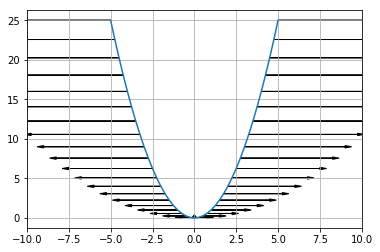

In [2]:
def f1(x):
    return x**2

def df1(x):
    return 2*x

if __name__ == '__main__':
    # Function to plot
    X = np.arange(-5, 5.01, 0.25)
    fig = plt.figure()
    plot_1d(X, f1(X), fig)
    plot_gradient (X, f1(X), df1(X), fig=fig)
    fig.gca().set_xlim(-10, 10)

Per tant, una possible estratègia per maximitzar (*minimitzar*) la funció és repetir la següent estratègia:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient.
3. Fer un petit pas en la direcció (*contraria*) del vector gradient: $x^{k+1} = x^{k}-\alpha^{k} \nabla f(x^{k})$
4. Repetir des de 2

La cerca s'acabaria quan el vector gradient és zero, que vol dir que hem trobat un màxim (*mínim*). Donat que la precisió flotant potser evita que arribem mai a aquest nombre, afegim dos mètodes més per acabar la cerca:

1. Si el moviment que realitzem és més petit que un epsilon ($|x^{k+1} - x^{k}| < eps$)
2. Si realitzem més de `max_iters` iteracions

Si la funció és **unimodal** (conté un únic màxim (*mínim*)), hem trobat la nostra solució. 
Sinó, pot ser que estem en un màxim (*mínim*) local i que sigui una solució no satisfactòria.

**Implementa la funció *gradient_descend_1d* seguint el procediment proposat. Durant el procés d'optimització visualitza els punts de la gràfica per on vagis passant.**

Recordeu que els ordinadors generen un error numèric, per tant no heu d'igualar mai a zero, heu de fer servir una tolerància.
Definiu també un nombre màxim d'iteracions que l'algorisme pot realitzar per arribar al punt desitjat.

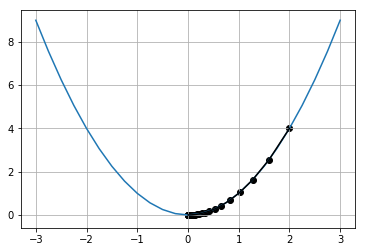

In [3]:
# Implementar per l'alumne

def gradient_descend_1d(grad, x, alpha, eps=1e-3, max_iters=1e2):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient, és a dir,
    donat un punt inicial, el gradient i el pas, intenta trobar el mínim
    de la funció seguint el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iters: Iteracions màximes a realitzar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * El mínim trobat.
    """
    iteracions = 0
    x_k1 = x
    x_k = x_k1 + eps + 1 # fem aquesta assignacio per poder entrar al bucle seguent la primera vegada
    passos = [x] # afegim el punt inicial
    while (iteracions < max_iters and abs(x_k1-x_k) >= eps): # les condicions per parar son dues: 
        x_k = x_k1 #actualitzem la x^k                          # 1. hem arribat al nombre maxim d'iteracions
        x_k1 = x_k - alpha*grad(x_k) #actualitzem la x^(k+1)    # 2. el pas de x^k a x^(k+1) es mes petit que la tolerancia
        passos.append(x_k1) # afegim el nou punt
        iteracions+=1
    
    return (np.array(passos), x_k1)

if __name__ == '__main__':
    X = np.arange(-3, 3.01, 0.25)
    points, minimum = gradient_descend_1d(df1, 2, .1)

    fig = plt.figure()
    plot_gradient_descend_1d(f1, X, points, minimum, fig)

Però... són totes els funcions unimodals? Obviament no.

Podem tenir funcions que contenen un màxim i un mínim. Per veure com es comporten aquestes funcions **repeteix el procediment anterior amb aquesta nova funció**.

$$f_2(x) = x^3 - 2x + 2$$

$$ \frac{\partial f_2}{\partial x} = 3x^2 -2 x$$

In [4]:
def f2 ( x ):
    return x**3 - 2*x + 2

def df2(x):
    return 3*x**2 - 2

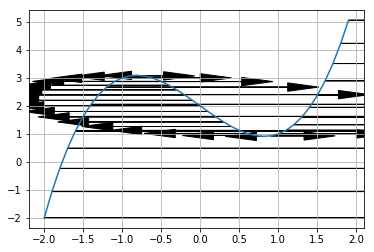

In [5]:
if __name__ == '__main__':
    X = np.arange(-2, 2, 0.1)
    fig = plt.figure()
    plot_1d(X, f2(X), fig)
    plot_gradient(X, f2(X), df2(X), fig=fig)

**Començant en el punt $x=0.75$, és possible arribar a valors de $x < -1$ en 10 o menys iteracions? Fer proves demostrant que es pot, o no, arribar-hi.**

**Justifica el comportament del procés d'optimització**

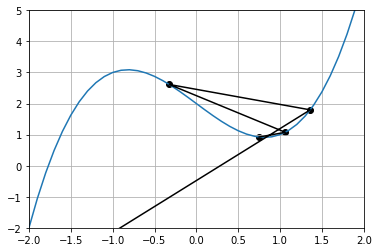

In [6]:
#Cas alfa = 1 (valor gran d'alfa)
if __name__ == '__main__':
    X = np.arange(-20, 20, 0.1)
    x0 = 0.75
    points, minimum = gradient_descend_1d(df2, x0, 1, max_iters=10)

    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])

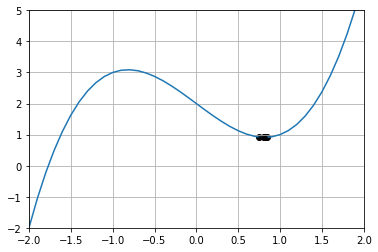

In [7]:
#Cas alfa = 0.3 (valor petit d'alfa)
if __name__ == '__main__':
    X = np.arange(-20, 20, 0.1)
    x0 = 0.75
    points, minimum = gradient_descend_1d(df2, x0, 0.3, max_iters=10)

    fig = plt.figure()
    plot_gradient_descend_1d(f2, X, points, minimum, fig)
    fig.gca().set_ylim([-2, 5])
    fig.gca().set_xlim([-2, 2])

### Resposta a la qüestió plantejada

Tal i com podem comprovar en el gràfic anterior, el punt inicial $x^{(0)}=0.75$ és molt proper a un mínim local de la funció, que és $x=\sqrt{\frac{2}{3}} \approx 0.81649658092$. Per tant, podríem pensar que començant amb aquest punt inicial el mètode del gradient hauria de convergir a aquest mínim local, ja que com que $x^{(0)}$ es troba a prop d'aquest, el gradient de f avaluat en $x^{(0)}$ té un mòdul proper a 0 (com podem observar $\big |\: \nabla f(0.75)\: \big| = \big|\:3·0.75^2-2\:\big|=0.3125$). No obstant, el punt $x^{(k+1)}$ calculat a cada iteració depèn també de la constant $\alpha$, seguint la fórmula $x^{(k+1)} = x^{(k)} - \alpha·\nabla f(x^{(k)})$. Per tant, el fet que el punt $x^{(1)}$ continuï trobant-se a prop del mínim local dependrà també del valor d'$\alpha$.<br>

Després d'haver realitzat diverses proves, hem arribat a la següent conclusió:
- Si $\alpha$ té un valor petit, aleshores el producte $\alpha·\nabla f(x^{(0)})$ tindrà un valor petit i negatiu i per tant el punt $x^{(1)}$ continuarà sent proper al mínim local de f i de fet, s'hi haurà apropat. Per tant, el valor de $\big |\: \nabla f(x^{(1)})\: \big|$ serà més petit que en la iteració anterior i per tant el producte $\big|\:\alpha·\nabla f(x^{(1)})\:\big|$ també tindrà un valor més petit. Així, podem concloure que $x^{(2)}$ serà més proper al mínim local que $x^{(1)}$. Repetint aquest procés, podem arribar a la conclusió que el mètode del gradient acabarà convergint cap al mínim local de f descrit abans. Per tant, en aquest cas no serà possible arribar a valors de $x < -1$ en 10 iteracions o menys, ja que els iterats no sortiran de la conca d'atracció del mínim local. Podem veure un exemple d'aquest cas en la cel·la anterior amb $\alpha = 0.3$.
- Si $\alpha$ té un valor suficientment gran, aleshores el producte $\alpha·\nabla f(x^{(0)})$ tindrà un valor gran i negatiu i per tant el punt $x^{(1)}$ s'haurà allunyat bastant del punt $x^{(0)}$. A més, el punt $x^{(1)}$ es trobarà a la dreta del mínim local. Aleshores, el producte $\big|\:\alpha·\nabla f(x^{(1)})\:\big|$ tindrà un valor més gran que en la iteració anterior i per tant el punt $x^{(2)}$ serà inferior al punt $x^{(0)}$. Repetint aquest procés començant amb $x^{(2)}$, podem arribar a la conclusió que $x^{(4)}$ serà inferior al punt $x^{(2)}$. Per tant, el mètode del gradient s'allunyarà del mínim local de f descrit abans, és a dir, arribarà un moment en què els iterats sortiran de la conca d'atracció del mínim local. En el moment en què passi això, a causa de les propietats de la funció f, hi haurà un moment en què un iterat concret, per exemple $x^{(2k)}$, tindrà un valor inferior a -1. Un cop passi això, els iterats successius seran cada vegada més petits, ja que en el domini $(-\infty, -1)$ el gradient de f és sempre positiu. Per tant, podem concloure que si definim un $\alpha$ suficientment gran, en aquest cas serà possible arribar a valors de $x < -1$ en 10 iteracions o menys. Després de fer diverses proves, hem vist que per exemple amb un valor de $\alpha$ = 1, a partir de la 4a iteració ja se satisfà. Aquest exemple es pot observar dues cel·les amunt.

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

#### Podem assegurar que sempre arribem a un minim?

Suposa ara la funció
$$
f_{2.2}(x) = \frac{x}{1+x^2}
$$
amb gradient
$$ \frac{\partial f_{2.2}}{\partial x} = \frac{1-x^2}{(1+x^2)^2}
$$

In [8]:
def f2_2(x):
    return x / (1 + x**2)

def df2_2(x):
    return (1 - x**2) / (1 + x**2)**2

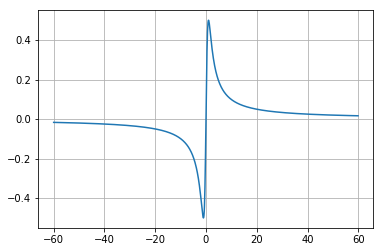

In [9]:
if __name__ == '__main__':
    X = np.arange(-60, 60, 0.1)
    fig = plt.figure()
    plot_1d(X, f2_2(X), fig)

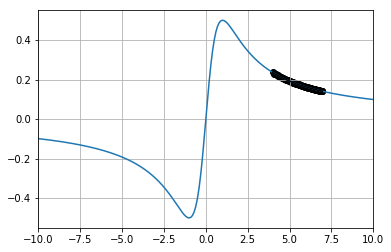

In [10]:
if __name__ == '__main__':
    x0 = (np.random.random() - 0.5) * 10
    points, minimum = gradient_descend_1d(df2_2, x0, 1)

    fig = plt.figure()
    plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
    fig.gca().set_xlim([-10, 10])

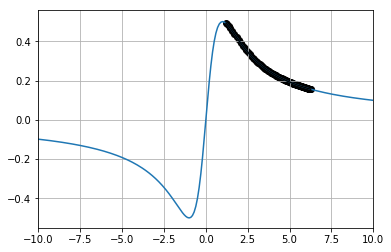

In [11]:
# Cas x_0 > 1
if __name__ == '__main__':
    x0 = 1.2
    points, minimum = gradient_descend_1d(df2_2, x0, 1)

    fig = plt.figure()
    plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
    fig.gca().set_xlim([-10, 10])

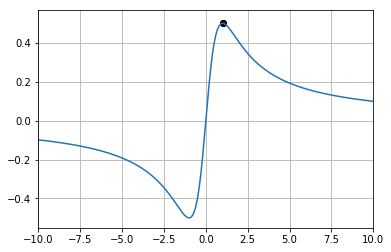

In [12]:
# Cas x_0 = 1
if __name__ == '__main__':
    x0 = 1
    points, minimum = gradient_descend_1d(df2_2, x0, 1)

    fig = plt.figure()
    plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
    fig.gca().set_xlim([-10, 10])

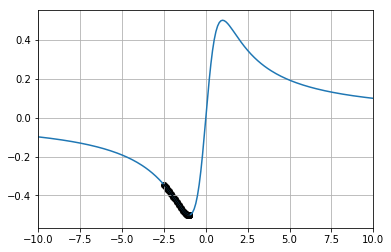

In [13]:
# Cas x_0 < 1
if __name__ == '__main__':
    x0 = -2.5
    points, minimum = gradient_descend_1d(df2_2, x0, 1)

    fig = plt.figure()
    plot_gradient_descend_1d(f2_2, X, points, minimum, fig)
    fig.gca().set_xlim([-10, 10])

**Justifica el comportament per diferent punts d'inici. Podem arribar sempre al mínim? **

### Resposta a la qüestió plantejada

Clarament la resposta és negativa. És a dir, no podem assegurar que el mètode arribi sempre a un mínim. Per tal de veure això, podem utilitzar la funció $f_{2,2}$ definida anteriorment com a contraexemple. Per tal de comprovar-ho, podem tractar diferents casos en funció del punt d'inici $x^{(0)}$ (que es poden observar gràficament a les cel·les anteriors):
- En el cas que el punt d'inici sigui $x^{(0)}>1$, el gradient de $x^{(0)}$ serà negatiu i per tant el punt $x^{(1)}$ serà més gran que $x^{(0)}$. Ara, podem observar que per a tot $x > 1$, el gradient de $x$ és negatiu i per tant, donat un $x^{(k)} > 1$, $x^{(k+1)}$ serà més gran que $x^{(k)}$. D'aquest fet deduïm que en aquest cas l'algorisme no convergirà a un mínim local, sinó que tendirà a $+\infty$.
- En el cas que el punt d'inici sigui $x^{(0)}=1$, el gradient de $x^{(0)}$ serà nul, ja que és un màxim de $f_{2,2}$ i per tant el punt $x^{(1)}$ serà igual al punt $x^{(0)}$. Un cop passi això s'acabarà el mètode, ja que $|\:x^{(1)}-x^{(0)}\:|=0<eps$. Per tant, en aquest cas l'algorisme no convergirà a un mínim local, sinó que es quedarà en el màxim $x=1$.
- En el cas que el punt d'inici sigui $x^{(0)}<1$, $x^{(0)}$ es trobarà a la conca d'atracció del mínim local $x=-1$. Per tant, podem definir una $\alpha$ adequada tal que el mètode del gradient sigui convergent cap al mínim local de $f_{2,2}$.

Havent vist això, podem arribar a la conclusió que no sempre és possible obtenir un mínim local d'una funció usant aquest mètode.

A més, en el cas que el mètode convergeixi a un mínim de f, no es pot assegurar que sigui el mínim absolut de f, ja que aquest mètode actua localment.

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

### Cas N-dimensionals

Podem aplicar el procediment anterior quan tenim funcions dos-dimensionals? La resposta és que sí. 

L'unic canvi en el procediment és que ara caldrà avançar en dues direccions.

Sigui la funció 2-dimensional $f_3$:
$$ f_3(x_1, x_2) = x_1^2 + x_2^2$$

i el seu gradient:

$$\nabla {f_3(x_1, x_2)} = 
\left( \frac{\partial f_3}{\partial x_1}, \frac{\partial f_3}{\partial x_2}\right) = 
\left( 2 x_1, 2 x_2 \right)$$

Visualitza la forma de grafica i el comportament del seu gradient.

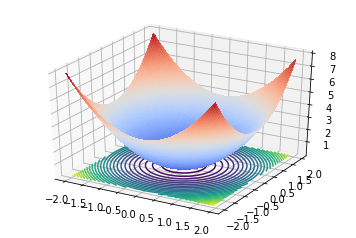

In [14]:
def f3 ( x, y=None ):
    if y is None:
        # x is an array with 2 rows
        x, y = x
        
    return x**2 + y**2

def grad_f3(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((2 * x, 2 * y))

if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    X, Y, Z = generate_grid(f3)
    plot_2d(X, Y, Z, fig)

Per veure millor el gradient en aquest cas, podem imprimir el seu comportament en un pla.

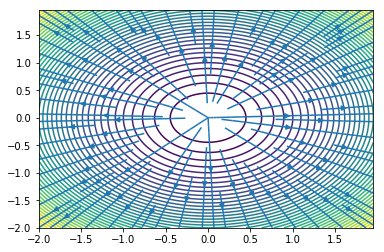

In [15]:
if __name__ == '__main__':
    fig = plt.figure()
    project_gradient(f3, grad_f3, fig)

Implamenteu l'algorisme anterior amb el cas 2-dimensional.

Recordeu amb amb la llibreria numpy podeu sumar o restar vectors, multiplicar per un escalar, etc.

In [16]:
# Algorithm that implement the gradient descent
def gradient_descend_2d(gradient, x, alpha=0.1, eps=1e-6, max_iter=1000, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param alpha: Pas de cada iteració
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * El mínim trobat
    """    
    iteracions = 0
    x_k1 = x
    x_k = x_k1 + eps + 1 # fem aquesta assignacio per poder entrar al bucle seguent la primera vegada
    passos = [x] # afegim el punt inicial
    while (iteracions < max_iter and np.linalg.norm(x_k1-x_k) >= eps): # les condicions per parar son dues: 
        x_k = x_k1 #actualitzem la x^k                                  # 1. hem arribat al nombre maxim d'iteracions
        x_k1 = x_k - alpha*gradient(x_k) #actualitzem la x^(k+1)        # 2. el pas de x^k a x^(k+1) es mes petit que la
        passos.append(x_k1) # afegim el nou punt                             tolerancia
        iteracions+=1
    
    if (verbose):
        print("Nombre d'iteracions realitzades:", iteracions)
        
    return (np.array(passos), x_k1)

if __name__ == '__main__':
    x0 = np.asarray([1, 1])
    points, minimum = gradient_descend_2d(grad_f3, x0)

Nombre d'iteracions realitzades: 58


Minimum:  [ 0.  0.]


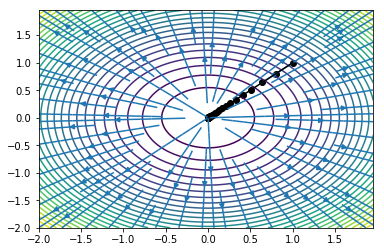

In [17]:
if __name__ == '__main__':
    print ("Minimum: ", np.round(minimum,3))

    fig = plt.figure()
    X, Y, _ = generate_grid(f3)
    plot_gradient_descend_2d(f3, grad_f3, X, Y, points, minimum, fig)

Considera ara la funció
$$f_4(x_1, x_2) = 100(x_1^2 + x_2^2)$$

amb gradient

$$\nabla {f_4(x_1, x_2)} = 
\left( \frac{\partial f_4}{\partial x_1}, \frac{\partial f_4}{\partial x_2}\right) = 
\left( 200 x_1, 200 x_2 \right)$$

En aquest cas, igual que en molts altres, és més útil utilizar el gradient normalizat per aplicar l'algorisme. 

** Fent servir `gradient_descend_2d`, podeu trobar el mínim de les funcions $f_3$ i $f_4$ amb el següents paràmetres:**

* $\alpha$ igual en les dues crides, es pot modificar
* $x=(1, 1)$ en les dues crides
* `max_iter=100` en les dues crides
* `eps=1e-6` en les dues crides

**Justifica perque són capaços, o no, de trobar el mínim amb aquest paràmetres. Quines dificultats presenta?**

In [18]:
def f4(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return 100 * (x**2 + y**2)

def grad_f4(x, y=None):
    if y is None:
        x, y = x # x is an array with 2 rows
    return np.asarray((200 * x, 200 * y))

In [22]:
if __name__ == '__main__':
    x0 = np.asarray((1, 1))
    alpha = 0.0075
    points_f3, minimum_f3 = gradient_descend_2d(grad_f3, x0, alpha=alpha, max_iter=100, eps=1e-6)
    points_f4, minimum_f4 = gradient_descend_2d(grad_f4, x0, alpha=alpha, max_iter=100, eps=1e-6)

Nombre d'iteracions realitzades: 100
Nombre d'iteracions realitzades: 23


[ 0.22060891  0.22060891]


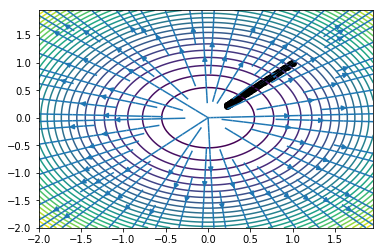

In [23]:
if __name__ == '__main__':
    fig = plt.figure()
    X, Y, _ = generate_grid(f3)
    plot_gradient_descend_2d(f3, grad_f3, X, Y, points_f3, minimum_f3, fig)
    print(minimum_f3)

[ -1.19209290e-07  -1.19209290e-07]


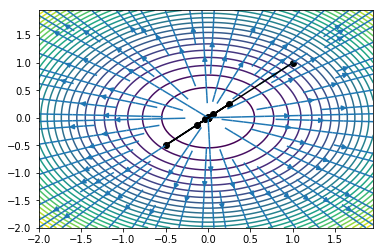

In [24]:
if __name__ == '__main__':
    fig = plt.figure()
    X, Y, _ = generate_grid(f4)
    plot_gradient_descend_2d(f4, grad_f4, X, Y, points_f4, minimum_f4, fig)
    print(minimum_f4)

### Resposta a la qüestió plantejada

Per tal de respondre a la pregunta plantejada, considerem primer que podem fer un nombre infinit d'iteracions, que l'únic mínim de les funcions $f_3$ i $f_4$ és el punt (0,0) i que el punt inicial del mètode del gradient no serà (0,0).

Anem a observar primer el comportament del mètode del gradient amb la funció $f_3$. En aquest cas, tenim que donat un punt $x^{(k)}=(x_1^{(k)},x_2^{(k)})$, el gradient de $f_3$ en aquest punt és $(2x_1^{(k)}, 2x_2^{(k)})$. Per tant, el punt $x^{(k+1)}$ calculat amb el mètode del gradient serà $x^{(k+1)}=(x_1^{(k)}-\alpha·2x_1^{(k)},x_2^{(k)}-\alpha·2x_2^{(k)})=((1-2\alpha)·x_1^{(k)},(1-2\alpha)·x_2^{(k)})$

Ara, observem que podem tenir diferents casos:
- Si $\mathbf{\alpha < 1}$, aleshores $|\:1-2\alpha\:| < 1$. Per tant, la distància entre el punt $x^{(k+1)}$ i (0,0) serà menor que la distància entre $x^{(k)}$ i (0,0), ja que $|\:x_1^{(k+1)}\:| < |\:x_1^{(k)}\:|$ i $|\:x_2^{(k+1)}\:| < |\:x_2^{(k)}\:|$. Per tant, podem concloure que cada iterat es trobarà més a prop de l'origen que l'iterat anterior. Per tant, el mètode del gradient (suposant que podem fer infinites iteracions) convergeix cap a l'origen, que és el mínim de $f_3$.
- Si $\mathbf{\alpha = 1}$, aleshores $1-2\alpha = -1$. Per tant, el punt $x^{(k+1)} = -x^{(k)}$. Per tant, si comencem el mètode del gradient amb un punt $x^{(0)}$, la successió de punts obtinguts amb el mètode del gradient serà: \{$x^{(0)}, -x^{(0)}, ..., x^{(0)}, -x^{(0)}, ...\}$. Per tant, el mètode del gradient no convergirà cap al mínim de $f_3$.
- Si $\mathbf{\alpha > 1}$, aleshores $|\:1-2\alpha\:| > 1$. Per tant, la distància entre el punt $x^{(k+1)}$ i (0,0) serà major que la distància entre $x^{(k)}$ i (0,0), ja que $|\:x_1^{(k+1)}\:| > |\:x_1^{(k)}\:|$ i $|\:x_2^{(k+1)}\:| > |\:x_2^{(k)}\:|$. Per tant, podem concloure que cada iterat es trobarà més lluny de l'origen que l'iterat anterior. Per tant, el mètode del gradient (suposant que podem fer infinites iteracions) no convergeix cap a l'origen, que és el mínim de $f_3$.

En conclusió, el mètode del gradient convergirà cap al mínim de $f_3$ si i només si $\alpha \in (0,1)$.

A continuació, anem a observar el comportament del mètode del gradient amb la funció $f_4$. En aquest cas, tenim que donat un punt $x^{(k)}=(x_1^{(k)},x_2^{(k)})$, el gradient de $f_4$ en aquest punt és $(200x_1^{(k)}, 200x_2^{(k)})$. Per tant, el punt $x^{(k+1)}$ calculat amb el mètode del gradient serà $x^{(k+1)}=(x_1^{(k)}-\alpha·200x_1^{(k)},x_2^{(k)}-\alpha·200x_2^{(k)})=((1-200\alpha)·x_1^{(k)},(1-200\alpha)·x_2^{(k)})$

Ara, observem que podem tenir diferents casos:
- Si $\mathbf{\alpha < 0.01}$, aleshores $|\:1-200\alpha\:| < 1$. Per tant, la distància entre el punt $x^{(k+1)}$ i (0,0) serà menor que la distància entre $x^{(k)}$ i (0,0), ja que $|\:x_1^{(k+1)}\:| < |\:x_1^{(k)}\:|$ i $|\:x_2^{(k+1)}\:| < |\:x_2^{(k)}\:|$. Per tant, podem concloure que cada iterat es trobarà més a prop de l'origen que l'iterat anterior. Per tant, el mètode del gradient (suposant que podem fer infinites iteracions) convergeix cap a l'origen, que és el mínim de $f_4$.
- Si $\mathbf{\alpha = 0.01}$, aleshores $1-200\alpha = -1$. Per tant, el punt $x^{(k+1)} = -x^{(k)}$. Per tant, si comencem el mètode del gradient amb un punt $x^{(0)}$, la successió de punts obtinguts amb el mètode del gradient serà: \{$x^{(0)}, -x^{(0)}, ..., x^{(0)}, -x^{(0)}, ...\}$. Per tant, el mètode del gradient no convergirà cap al mínim de $f_4$.
- Si $\mathbf{\alpha > 0.01}$, aleshores $|\:1-200\alpha\:| > 1$. Per tant, la distància entre el punt $x^{(k+1)}$ i (0,0) serà major que la distància entre $x^{(k)}$ i (0,0), ja que $|\:x_1^{(k+1)}\:| > |\:x_1^{(k)}\:|$ i $|\:x_2^{(k+1)}\:| > |\:x_2^{(k)}\:|$. Per tant, podem concloure que cada iterat es trobarà més lluny de l'origen que l'iterat anterior. Per tant, el mètode del gradient (suposant que podem fer infinites iteracions) no convergeix cap a l'origen, que és el mínim de $f_4$.

En conclusió, el mètode del gradient convergirà cap al mínim de $f_4$ si i només si $\alpha \in (0,0.01)$.

Un cop vist això, podem concloure que usant el mateix valor d'$\alpha$, el mètode del gradient convergirà cap al mínim de $f_3$ i cap al mínim de $f_4$ si i només si $\alpha \in (0,1) \cap (0,0.01) = (0,0.01)$.

No obstant, els resultats vistos anteriorment només són certs en el cas que poguéssim fer infinites iteracions. Com que en els testos anteriors usem un nombre màxim de 100 iteracions i la convergència del mètode del gradient aplicat a $f_3$ és molt lenta quan $\alpha \in (0,0.01)$ serà impossible trobar un valor de $\alpha$ amb el qual els dos mètodes convergeixin amb el nombre d'iteracions donat.

<hr />

* RECORDA JUSTIFICAR LA RESPOSTA

<hr />

## Temps de convergència

Observa ara la següent funció, anomenada funció de **Rosenbrock**.

$$ f(x_1, x_2) = (a - x_1)^2 + b (x_2 - x_1^2)^2$$

**El mínim d'aquesta funció es troba al punt: $(x_1, x_2) = (a, a^{2})$.**

In [25]:
A_ROS = 1

def f_ros(x, y=None, a=A_ROS, b=10):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return (a-x)**2 + b*(y-x**2)**2

def grad_f_ros(x, y=None, a=A_ROS, b=10):
    if y is None:
        x, y = x # x is an array with 2 rows
        
    return np.asarray((-2*a + 4*b*x**3 - 4*b*x*y + 2*x, 2*b*(y-x**2)))

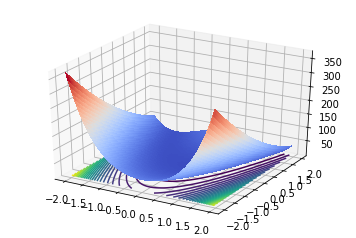

In [26]:
if __name__ == '__main__':
    # Surface to plot
    fig = plt.figure()
    X, Y, Z = generate_grid(f_ros)
    plot_2d(X, Y, Z, fig)

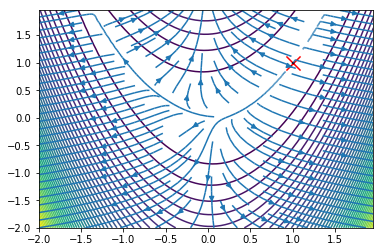

In [27]:
if __name__ == '__main__':
    fig = plt.figure()
    project_gradient(f_ros, grad_f_ros, fig)
    plt.scatter(A_ROS, A_ROS**2, marker='x', color='r', s=200)

Aquesta funció té un mínim molt pla, la pendent és pràcticament nula al sel voltat, pel que els mètodes iteratius triguen molt a trobar el mínim

Nombre d'iteracions realitzades: 2109
[ 0.99988876  0.99977307]


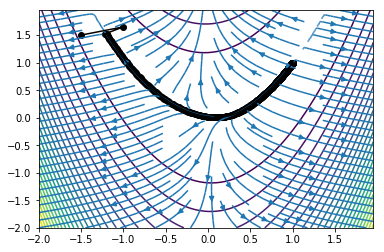

In [28]:
if __name__ == '__main__':
    fig = plt.figure()
    x0 = np.asarray((-1.5, 1.5))
    points, minimum = gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000)
    X, Y, _ = generate_grid(f_ros)
    plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
    print(minimum)

## Trobant el pas òptim

Una possibilitat per fer menys iteracions i accelerar la convergència és trobant el valor de $\alpha$ automàticament a cada pas, és a dir aquella $\alpha$ que fa mínim el valor de $f$.

L'algorisme és tal que:

1. Col·locar-se en un punt aleatori (un valor aleatori de $\mathbf{x}$)
2. Calcular el vector gradient
3. $\alpha = 10$
4. Calcular $x^{k+1} = x^{k}-\alpha \nabla f(x^{k})$
5. Si $f(x^{k+1}) > f(x^{k})$, $\alpha = \alpha / 2$, descartar $x^{k+1}$ i tornar al pas 4
6. En cas contrari, moure's a $x^{k+1}$ i repetir des de 2

In [29]:
def gradient_descend_2d_auto(f, gradient, x, eps=1e-6, max_iter=1000, initial_alpha=10, verbose=True):
    """
    Aquesta funció implementa l'algorisme de descens pel gradient en el 
    cas 2-DIMENSIONAL, és a dir, donat un punt inicial (x_0, x_1), 
    el gradient i el pas, intenta trobar el mínim de la funció seguint 
    el gradient en direcció oposada.
    
    :param f: Funció a minimitzar
    :param grad: Gradient de la funció
    :param x: Punt inicial
    :param eps: Moviment mínim realitzat abans de parar
    :param max_iter: Iteracions màximes a realitzar
    :param initial_alpha: Pas inicial a cada iteració, corresponent al punt 3 anterior
    :param verbose: En case de ser True, la funció ha d'imprimir el nombre d'iteracions fetes
        abans de retornar
    :return: La funció retornarà una llista/tupla amb:
        * Una np.array [X, 2] amb el punt inicial més els punts on s'ha mogut a cada iteració, 
            on X és el nombre d'iteracions fetes + 1
        * El mínim trobat.
    """ 
    iteracions = 0
    x_k1 = x
    x_k = x_k1 + eps + 1 # fem aquesta assignacio per poder entrar al bucle seguent la primera vegada
    passos = [x] # afegim el punt inicial
    alpha = initial_alpha
    while (iteracions < max_iter and np.linalg.norm(x_k1-x_k) >= eps): # les condicions per parar son dues:
        alpha = initial_alpha                                          # 1. hem arribat al nombre maxim d'iteracions
        x_k = x_k1 #actualitzem la x^k                                 # 2. el pas de x^k a x^(k+1) es mes petit que la tolerancia              
        grad_x_k = gradient(x_k)    #calculem el gradient de f a x^k                                     
        x_k1 = x_k - alpha*grad_x_k #actualitzem la x^(k+1)                 
        
        while (f(x_k1) > f(x_k)): # si f(x^(k+1)) > f(x_k), reduim el pas i tornem a calcular x^(k+1)
            alpha = alpha / 2. # reduim el pas a realitzar en cada iteracio
            x_k1 = x_k - alpha*grad_x_k # tornem a calcular x^(k1) fent un pas mes petit
        
        passos.append(x_k1) # afegim el nou punt                             
        iteracions+=1
    
    if (verbose):
        print("Nombre d'iteracions realitzades:", iteracions)
        
    return (np.array(passos), x_k1)

Nombre d'iteracions realitzades: 1002
[ 0.99996455  0.99992681]


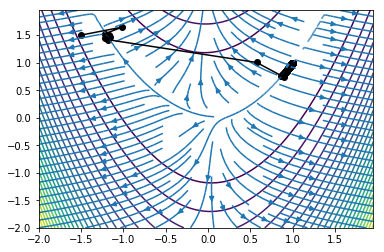

In [30]:
if __name__ == '__main__':
    fig = plt.figure()
    x0 = np.asarray((-1.5, 1.5))
    points, minimum = gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000)
    X, Y, _ = generate_grid(f_ros)
    plot_gradient_descend_2d(f_ros, grad_f_ros, X, Y, points, minimum, fig)
    print(minimum)

In [31]:
if __name__ == '__main__':
    %timeit gradient_descend_2d(grad_f_ros, x0, alpha=0.01, max_iter=10000, verbose=False)

31.7 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
if __name__ == '__main__':
    %timeit gradient_descend_2d_auto(f_ros, grad_f_ros, x0, max_iter=10000, verbose=False)

84.1 ms ± 5.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Noteu que el segon mètode pot trigar més (és més costós), però pot convergir en menys iteracions. 